<a href="https://colab.research.google.com/github/Sudeep2702/Deep-learning/blob/main/Tensor_flow_Ann_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
df1=pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/deep-learning/main/aps_data.csv")

<ipython-input-14-aab9475504a9>:1: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/deep-learning/main/aps_data.csv")


In [6]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [12]:
df.isnull().sum(
)

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
          ... 
ee_007      58
ee_008      58
ee_009      58
ef_000     242
eg_000     242
Length: 171, dtype: int64

In [10]:
df = df.replace("na",np.NaN)

In [11]:
pd.options.display.max_rows=100

In [22]:
df.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
          ... 
ee_007      58
ee_008      58
ee_009      58
ef_000     242
eg_000     242
Length: 171, dtype: int64

In [27]:
df.isnull().sum().sum()



71649

In [29]:
pd.DataFrame(df.isnull().sum().sort_values(ascending = False )).rename(columns={0:"null_value_count"})

,null_value_count
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
...,...
cj_000,38
ci_000,38
bt_000,12
aa_000,0


In [44]:
input_col = [feature for feature in df.columns if feature not in ["class"]]

In [42]:
target_col = [feature for feature in df.columns if feature == "class"]

In [47]:
df[target_col].head()

,class
0,neg
1,neg
2,neg
3,neg
4,neg


In [46]:
df[input_col].head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,6,0,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,90,0,0,66,0,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,30,NaN,16,14,0,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,444,NaN,14,12,0,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,82,NaN,12,10,0,0,0,0,1464,4980,...,1010,132,310,56,92,1292,0,0,0,0


In [56]:
for feature in df[input_col]:
  df[feature] = df[feature].fillna(df[feature].median())

In [57]:
df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [65]:
X =df.iloc[:,1:]
y= df.iloc[:, :1]

In [67]:
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,6,0,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,90,0,0,66,0,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,30,0.0,16,14,0,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,444,0.0,14,12,0,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,82,0.0,12,10,0,0,0,0,1464,4980,...,1010,132,310,56,92,1292,0,0,0,0


In [68]:
y.head()

,class
0,neg
1,neg
2,neg
3,neg
4,neg


In [69]:
X.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [72]:
y = pd.get_dummies(y,drop_first=True)

In [76]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   class_pos  5000 non-null   uint8
dtypes: uint8(1)
memory usage: 5.0 KB


In [77]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 170)
(1000, 170)
(4000, 1)
(1000, 1)


In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [80]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [82]:
print(X.shape[1])
print(y.shape[1])

170
1


In [90]:
classifier = Sequential()
classifier.add(Dense(units = 20,kernel_initializer= "he_uniform", activation = "relu",input_dim = 170))
classifier.add(Dense(units = 15,kernel_initializer= "he_uniform", activation = "relu"))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


In [91]:
classifier.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [92]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                3420      
                                                                 
 dense_7 (Dense)             (None, 15)                315       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 3,751
Trainable params: 3,751
Non-trainable params: 0
_________________________________________________________________


In [95]:
model_history= classifier.fit(X_train,y_train,batch_size=10,epochs = 30,validation_split = 0.2)

Epoch 1/30
320/320 [==============================] - 7s 4ms/step - loss: 0.1680 - accuracy: 0.9634 - val_loss: 0.0790 - val_accuracy: 0.9800
Epoch 2/30
320/320 [==============================] - 1s 3ms/step - loss: 0.0461 - accuracy: 0.9841 - val_loss: 0.0541 - val_accuracy: 0.9825
Epoch 3/30
320/320 [==============================] - 1s 3ms/step - loss: 0.0341 - accuracy: 0.9884 - val_loss: 0.0607 - val_accuracy: 0.9787
Epoch 4/30
320/320 [==============================] - 1s 3ms/step - loss: 0.0229 - accuracy: 0.9916 - val_loss: 0.0487 - val_accuracy: 0.9837
Epoch 5/30
320/320 [==============================] - 1s 3ms/step - loss: 0.0170 - accuracy: 0.9934 - val_loss: 0.0436 - val_accuracy: 0.9850
Epoch 6/30
320/320 [==============================] - 1s 4ms/step - loss: 0.0156 - accuracy: 0.9953 - val_loss: 0.0483 - val_accuracy: 0.9850
Epoch 7/30
320/320 [==============================] - 1s 4ms/step - loss: 0.0127 - accuracy: 0.9950 - val_loss: 0.0446 - val_accuracy: 0.9875
Epoch 

In [97]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [99]:
pd.DataFrame(model_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.168003,0.963437,0.079016,0.98000
1,0.046135,0.984062,0.054088,0.98250
2,0.034107,0.988437,0.060703,0.97875
3,0.022929,0.991562,0.048706,0.98375
4,0.017046,0.993438,0.043562,0.98500
5,0.015649,0.995313,0.048252,0.98500
6,0.012659,0.995000,0.044605,0.98750
7,0.010354,0.996250,0.047475,0.98750
8,0.009705,0.996562,0.057646,0.98625
9,0.011537,0.997187,0.052365,0.98875


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


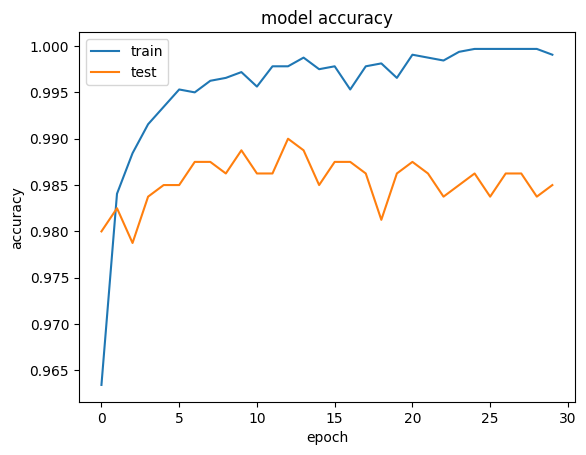

In [100]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

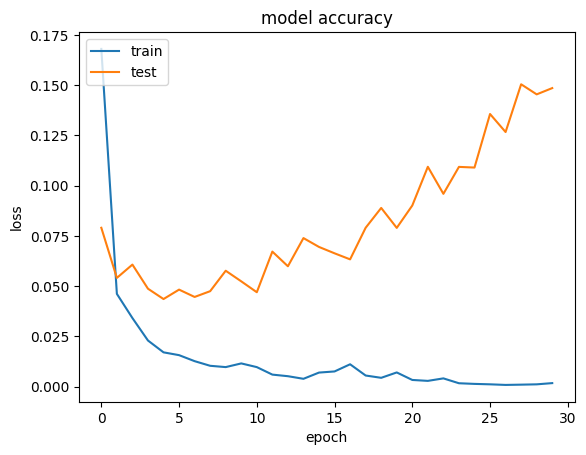

In [101]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [103]:
y_pred = classifier.predict(X_test)

32/32 [==============================] - 0s 2ms/step


In [104]:
y_pred=y_pred>0.5


In [108]:
from sklearn.metrics import confusion_matrix,f1_score


In [107]:
confusion_matrix(y_test,y_pred)

array([[981,   5],
       [  5,   9]])

In [110]:
f1 = f1_score(y_test, y_pred)

In [111]:
f1

0.6428571428571429